In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
frvideos = pd.read_csv('/content/drive/MyDrive/datasets/FRvideos_cc50_202101.csv')

In [22]:
frvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [23]:
print(frvideos.isnull().sum())

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


In [24]:
print(frvideos['description'].isnull().sum())

2912


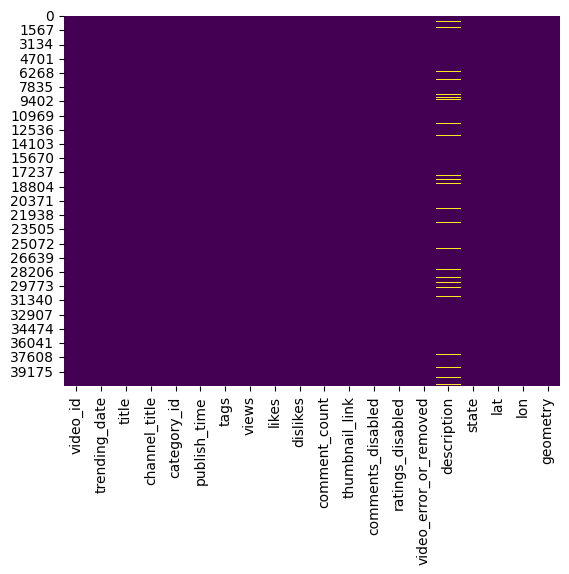

In [25]:
sns.heatmap(frvideos.isnull(), cbar=False, cmap='viridis')

# Muestra el gráfico
plt.show()

In [26]:
frvideos.drop('description', axis=1, inplace=True)

In [27]:
frvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [28]:
columnas_a_eliminar = ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'lat', 'lon','geometry']

In [29]:
 frvideos.drop(columns=columnas_a_eliminar, inplace=True)

In [30]:
frvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    40724 non-null  int64 
 1   views          40724 non-null  int64 
 2   likes          40724 non-null  int64 
 3   dislikes       40724 non-null  int64 
 4   comment_count  40724 non-null  int64 
 5   state          40724 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.9+ MB


In [31]:
columna_categorica = 'state'
frvideos_dummies = pd.get_dummies(frvideos[columna_categorica], prefix=columna_categorica)
frvideos = pd.concat([frvideos, frvideos_dummies], axis=1)
frvideos = frvideos.drop(columns=[columna_categorica])

In [ ]:
frvideos.info()

In [ ]:
frvideos.describe()

In [34]:
y = frvideos['views']

X = frvideos.drop('views', axis=1)
len(y)

40724

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.4, random_state = 101)

In [36]:
#modelo
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeficiente'])
coef_df

In [39]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel(' Y pruebas')
plt.xlabel(' Y predichos')
plt.show()

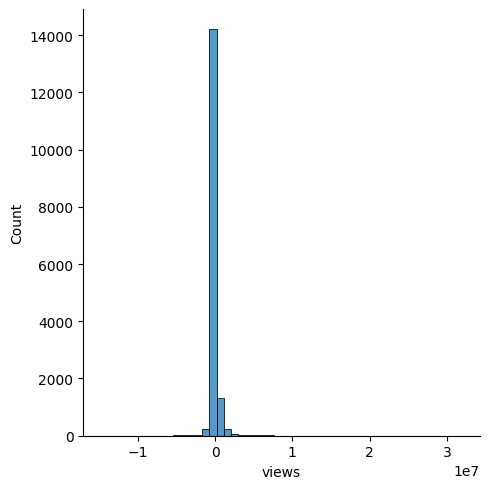

In [41]:
sns.displot((y_test-predictions), bins = 50)

In [42]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE 273780.07175547216
MSE 807939000016.4363
RMSE 523.2399753033709


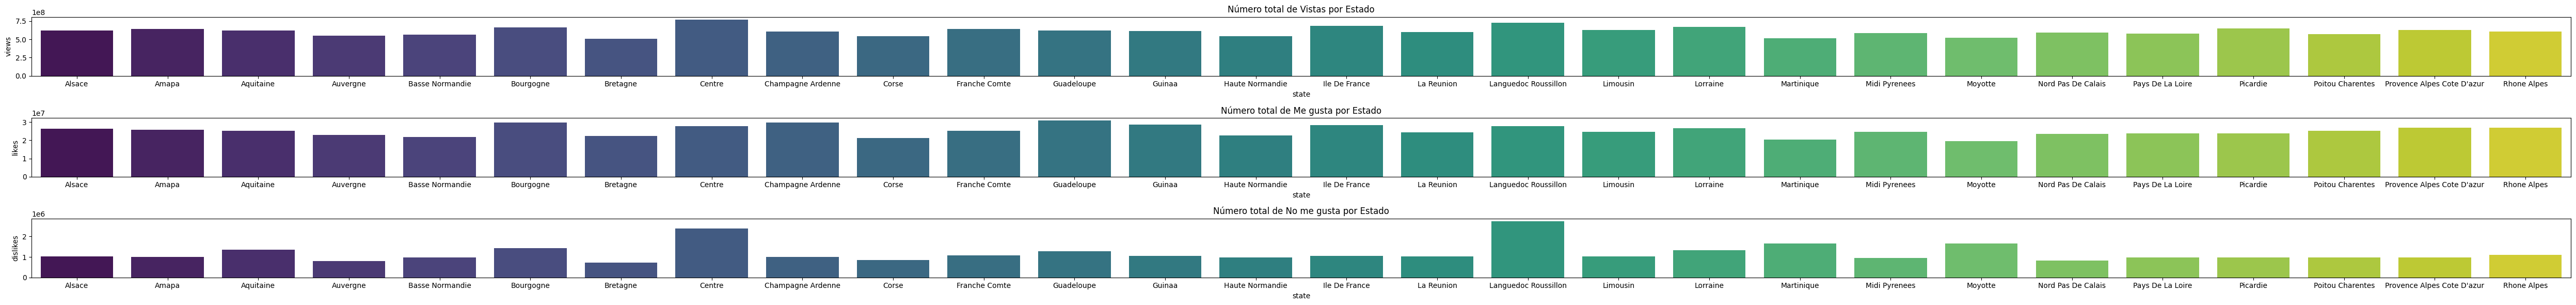

In [49]:
df_estado = frvideos.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index()

plt.figure(figsize=(50, 6))

plt.subplot(3, 1, 1)
sns.barplot(x='state', y='views', data=df_estado, palette='viridis')
plt.title('Número total de Vistas por Estado')

plt.subplot(3, 1, 2)
sns.barplot(x='state', y='likes', data=df_estado, palette='viridis')
plt.title('Número total de Me gusta por Estado')

plt.subplot(3, 1, 3)
sns.barplot(x='state', y='dislikes', data=df_estado, palette='viridis')
plt.title('Número total de No me gusta por Estado')

plt.tight_layout()
plt.savefig('pregunta7.png')

plt.show()
